# Differential expression between HR deficient and HR proficient tumours

In [76]:
rm(list=ls())

In [198]:
setwd("/Volumes/igmm/HGS-OvarianCancerA-SGP-WGS/")
sampleInfo<-read.table("BRCA1_BRCA2_SVs_paper/Manuscript/Intermediate_data/SampleInformation.txt",sep="\t",header=T,stringsAsFactors=F)
rownames(sampleInfo)<-sampleInfo[,1]
shgsoc_samples<-sampleInfo[sampleInfo$Cohort=="SH","Sample"]
length(shgsoc_samples)
write.table(shgsoc_samples,file="BRCA1_BRCA2_SVs_paper/SHGSOC_samples_inBRCASV_paper.txt",sep="\t",row.names=F,col.names=F,quote=F)

[1] 81

In [199]:

scottishcentre<-read.table("BRCA1_BRCA2_SVs_paper/Analysis/Clinical_associations/Scottish_samples_bycentre.csv",sep=",",header=T,row.names=1)
dim(scottishcentre[shgsoc_samples,])

#write.table(scottishcentre[shgsoc_samples,],file="BRCA1_BRCA2_SVs_paper/Analysis/Clinical_associations/SHGSOC_samples_inBRCASV_ms_bycentre.txt",sep="\t",quote=F)

[1] 81  2

In [200]:
sampleInfo$Cohort<-substr(sampleInfo$Sample,1,2)
table(sampleInfo$Cohort)

sum(is.na(sampleInfo[sampleInfo$Cohort=="DO","BRCA1_VST"])==FALSE)
sum(is.na(sampleInfo[sampleInfo$Cohort=="AO","BRCA1_VST"])==FALSE)
sum(is.na(sampleInfo[sampleInfo$Cohort=="SH","BRCA1_VST"])==FALSE)


AO DO SH 
80 44 81 

[1] 30

[1] 80

[1] 40

**Integrative modelling reveals complex mechanisms underlying repair deficiency** 

In [201]:
table(sampleInfo[sampleInfo$HRDetect>0.7,"BRCAstatus"])
1+2+15+2+28+8+15+1
table(sampleInfo[sampleInfo$BRCAstatus=="None" &sampleInfo$HRDetect>0.7 ,"BRCA1_pro_meth"])


Complex combination of SV intervals including 1+ LOF (CPX: LOF) 
                                                              1 
                         Complex combination of SVs without LOF 
                                                              2 
                                Deletion overlapping exon (LOF) 
                                                             15 
                          Duplication spanning gene (COPY_GAIN) 
                                                              2 
                                                   Germline SNV 
                                                             28 
                             Inversion spanning gene (INV_SPAN) 
                                                              8 
                                                           None 
                                                             34 
                                                    Somatic SNV 
                        

[1] 72


 0  1 
25  9 

In [202]:
sampleInfo[sampleInfo$Sample %in% c("DO29940","AOCS_170","AOCS_078"),]

,Sample,Cohort,BRCAstatus,BRCA1status,BRCA2status,BRCAstatus_SV,BRCA1status_SV,BRCA2status_SV,BRCA1status_compound,BRCA2status_compound,⋯,Facets_WGD_score,WGD,Purity,AvPloidy,Mutational_load,SV_load,CNV_load,ReSig_3,ReSig_5,HRDetect
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
AOCS_078,AOCS_078,AO,None,None,None,SV absent,SV absent,SV absent,None,None,⋯,0.942,1,0.610930,4.307108,11442,612,253,0,0,0.34510380
AOCS_170,AOCS_170,AO,None,None,None,SV absent,SV absent,SV absent,None,None,⋯,0.965,1,0.682233,4.236655,11355,925,179,0,0,0.20524066
DO29940,DO29940,DO,None,None,None,SV absent,SV absent,SV absent,None,None,⋯,0.246,0,0.913965,2.094982,6178,529,204,0,0,0.01532091


## Define HR proficient and HR deficient groups

HR deficient includes all samples with germline SNVs with complete loss. And somatic LOF SNVs. 

HR proficient includes no SNVs in big list of HR genes, low SV load, low CNV load, low SNV load, no promoter methylation.

Check against HRDetect scores for outliers.


In [203]:
brca_snvs<-sampleInfo[sampleInfo$BRCAstatus=="Germline SNV" | sampleInfo$BRCAstatus=="Somatic SNV","Sample"]
length(brca_snvs)
dim(sampleInfo)

hr_deficient_conservative<-brca_snvs
hr_deficient_conservative
write.table(hr_deficient_conservative,file="/Volumes/igmm/HGS-OvarianCancerA-SGP-WGS/BRCA1_BRCA2_SVs_paper/Manuscript/Intermediate_data/HGSOC_withBRCASNVs.txt",sep="\t",col.names=F,row.names=F,quote=F)

[1] 50

[1] 205  29

[1] "AOCS_034"  "AOCS_057"  "AOCS_058"  "AOCS_063"  "AOCS_065"  "AOCS_079" 
 [7] "AOCS_086"  "AOCS_088"  "AOCS_095"  "AOCS_104"  "AOCS_105"  "AOCS_108" 
[13] "AOCS_122"  "AOCS_130"  "AOCS_131"  "AOCS_139"  "AOCS_143"  "AOCS_145" 
[19] "AOCS_146"  "AOCS_147"  "AOCS_149"  "AOCS_152"  "AOCS_153"  "AOCS_171" 
[25] "DO28089"   "DO28119"   "DO28273"   "DO28521"   "DO29980"   "DO30220"  
[31] "DO30340"   "DO30970"   "DO31869"   "DO32237"   "DO32391"   "DO32420"  
[37] "SHGSOC001" "SHGSOC007" "SHGSOC009" "SHGSOC011" "SHGSOC022" "SHGSOC031"
[43] "SHGSOC043" "SHGSOC051" "SHGSOC056" "SHGSOC059" "SHGSOC072" "SHGSOC090"
[49] "SHGSOC094" "SHGSOC100"

**HR proficient**

In [204]:
samples_germline_HR<-read.table("/Volumes/igmm/HGS-OvarianCancerA-SGP-WGS/BRCA1_BRCA2_SVs_paper/Analysis/RNAseq/differentialExpression_HR/HGSOC_samples_with_germline_expandedHR_SNV.txt",sep="\t")
samples_germline_HR<-as.character(samples_germline_HR[,1])

In [205]:
samples_somatic_HR<-read.table("/Volumes/igmm/HGS-OvarianCancerA-SGP-WGS/BRCA1_BRCA2_SVs_paper/Analysis/RNAseq/differentialExpression_HR/HGSOC_samples_with_somatic_expandedHR_SNV.txt",sep="\t")
samples_somatic_HR<-as.character(samples_somatic_HR[,1])
length(samples_somatic_HR)

[1] 25

In [206]:
hrsnvs<-union(samples_germline_HR,samples_somatic_HR)
length(hrsnvs)


[1] 57

In [207]:
prof<-sampleInfo[setdiff(sampleInfo$Sample,hrsnvs),]
prof2<-prof[prof$BRCAstatus=="None",]
prof3<-prof2[prof2$ReSig_3==0 & prof2$ReSig_5==0,]
dim(prof3)
hr_proficient_samps<-prof3$Sample

hr_prof_scot_samples<-prof3[prof3$Cohort=="SH","Sample"]

write.table(hr_prof_scot_samples,file="/Volumes/igmm/HGS-OvarianCancerA-SGP-WGS/BRCA1_BRCA2_SVs_paper/Manuscript/Intermediate_data/SHGSOC_likely_HRproficient_samples.txt",
  sep="\t",col.names=F,row.names=F,quote=F)
write.table(hr_proficient_samps,file="/Volumes/igmm/HGS-OvarianCancerA-SGP-WGS/BRCA1_BRCA2_SVs_paper/Manuscript/Intermediate_data/Likely_HRproficient_samples.txt",
  sep="\t",col.names=F,row.names=F,quote=F)

[1] 47 29

## Load RNA data

In [29]:
library(tximport)

In [30]:
setwd("/Volumes/igmm/HGS-OvarianCancerA-SGP-WGS/rnaseq/analysis/SHGSOC")
# wd  = /exports/igmm/datastore/HGS-OvarianCancerA-SGP-WGS/rnaseq/analysis/SHGSOC
require(tximport)
require(DESeq2)

Loading required package: DESeq2
Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min


Attaching p

In [197]:
load("~/Desktop/Robjecttosetup_multivariablemodel.RData")
library(gdata)
keep(rna,sample_expr,txi.salmon2,sure=T)

In [33]:
#Load all salmon quantification files for three cohorts
files_scot<-dir("../../alignments/SHGSOC/salmon",pattern="quant.sf",recursive = T,full.names = TRUE)
files_scot_additional<-dir("../../bcbio/SHGSOC/2019-2-26",pattern="quant.sf",recursive = T,full.names = TRUE)
files_aocs<-dir("../AOCS/salmon",pattern="quant.sf",recursive = T,full.names = TRUE)
files_tcga<-dir("../../bcbio/TCGA_US_OV/TCGAvirtualproj",pattern="quant.sf",recursive = T,full.names = TRUE)
files<-c(files_scot,files_scot_additional,files_aocs,files_tcga)

rna_reps_to_exclude<-read.table("/Volumes/igmm/HGS-OvarianCancerA-SGP-WGS/BRCA1_BRCA2_SVs_paper/Analysis/RNAseq/RNAseq_replicates_forexclusion.txt",sep="\t")
rna_reps_to_exclude<-as.character(rna_reps_to_exclude[,1])

new_files_orig<-setdiff(files,rna_reps_to_exclude)
tx2knownGene <- read.csv("tx2gene.csv",header = F)

names(new_files_orig)[1:37]<-do.call("cbind",strsplit(new_files_orig[1:37],split = "[/.]"))[10,]
names(new_files_orig)[38:42]<-do.call("cbind",strsplit(new_files_orig[38:42],split = "[/.]"))[10,]
names(new_files_orig)[43:122]<-do.call("cbind",strsplit(new_files_orig[43:122],split = "[/.]"))[6,]
names(new_files_orig)[123:152]<-do.call("cbind",strsplit(new_files_orig[123:152],split = "[/.]"))[10,]

txi.salmon <- tximport(new_files_orig, type = "salmon", tx2gene = tx2knownGene)

In [32]:
sample<-read.table("/Volumes/igmm/HGS-OvarianCancerA-SGP-WGS/BRCA1_BRCA2_SVs_paper/Manuscript/Intermediate_data/SampleInformation.txt",sep="\t",header=T,stringsAsFactors=F)
sample_expr<-sample

rna_sampleids<-colnames(head(txi.salmon$counts))
rna_short_sampleids<-rep(NA,length(rna_sampleids))
rna_short_sampleids[1:42]<-substr(rna_sampleids[1:42],1,9)
rna_short_sampleids[43:122]<-substr(rna_sampleids[43:122],1,8)
rna_short_sampleids[123:152]<-substr(rna_sampleids[123:152],1,7)
rna<-data.frame(RNA_sample=rna_sampleids,Sample=rna_short_sampleids)
rna<-rna[as.character(rna$Sample) %in% as.character(sample_expr$Sample),]

new_files<-new_files_orig[as.character(rna$RNA_sample)]

txi.salmon2 <- tximport(new_files, type = "salmon", tx2gene = tx2knownGene)



ERROR: Error in head(txi.salmon$counts): object 'txi.salmon' not found


In [28]:
#load("~/Desktop/txi.salmon2.130220.RData")

## Set up condition

In [208]:
coldata<-merge(rna,sample_expr,by="Sample",all.x=T)
coldata$HRDtruth<-"Excluded"
coldata[(coldata$Sample %in% hr_deficient_conservative),"HRDtruth"]<-"HRDef"
coldata[(coldata$Sample %in% hr_proficient_samps),"HRDtruth"]<-"HRProf"
table(coldata$HRDtruth)
coldata$Cohort<-substr(as.character(coldata$Sample),1,2)

rownames(coldata)<-as.character(coldata$RNA_sample)

coldata[is.na(coldata$BRCA1status),"BRCA1status"]<-"Excluded"
coldata[is.na(coldata$BRCA2status),"BRCA2status"]<-"Excluded"
coldata<-coldata[as.character(rna$RNA_sample),]


coldata$condition<-factor(coldata$HRDtruth)
rownames(coldata)<-c(1:150)

dds <- DESeqDataSetFromTximport(txi.salmon2, 
                               colData = coldata,
                                design=~Cohort+Purity+condition)


Excluded    HRDef   HRProf 
      74       42       34 

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”using counts and average transcript lengths from tximport


## Run DESeq2

In [209]:
#HRD predictions
HRD<-which(coldata$condition!="Excluded")
ddsHRD<-dds[,HRD]
colData(ddsHRD)$condition<-droplevels(colData(ddsHRD)$condition)
ddsHRD <- DESeq(ddsHRD)
res<-results(ddsHRD)


estimating size factors
using 'avgTxLength' from assays(dds), correcting for library size
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


In [210]:
res["ENSG00000012048",]
res["ENSG00000139618",]

log2 fold change (MLE): condition HRProf vs HRDef 
Wald test p-value: condition HRProf vs HRDef 
DataFrame with 1 row and 6 columns
                        baseMean   log2FoldChange             lfcSE
                       <numeric>        <numeric>         <numeric>
ENSG00000012048 1077.48661482843 0.41058350869154 0.182416818705546
                            stat             pvalue              padj
                       <numeric>          <numeric>         <numeric>
ENSG00000012048 2.25079853713652 0.0243983002449277 0.142906558924607

log2 fold change (MLE): condition HRProf vs HRDef 
Wald test p-value: condition HRProf vs HRDef 
DataFrame with 1 row and 6 columns
                        baseMean     log2FoldChange             lfcSE
                       <numeric>          <numeric>         <numeric>
ENSG00000139618 845.884086364683 0.0674661140514938 0.201733325811729
                             stat            pvalue              padj
                        <numeric>         <numeric>         <numeric>
ENSG00000139618 0.334432170688831 0.738053466825632 0.876927675177256

## Filter to only protein coding

In [211]:
biom_res<-read.table("/Volumes/igmm/HGS-OvarianCancerA-SGP-WGS/rnaseq/analysis/SHGSOC/All_genes_quant_type.txt",sep="\t",header=T)
rownames(biom_res)<-as.character(biom_res[,1])
protein_coding_genes<-as.character(biom_res[biom_res$Gene.type=="protein_coding",1])

In [212]:
length(protein_coding_genes)

[1] 19731

In [57]:
protein_coding_genes[1]

[1] "ENSG00000198888"

In [213]:
resLFC <- lfcShrink(ddsHRD[protein_coding_genes,], coef="condition_HRProf_vs_HRDef",type="ashr")

resLFC$new.padj<-p.adjust(resLFC$pvalue, method="BH",n=length(protein_coding_genes))

res001<- resLFC[is.na(resLFC$padj)==FALSE & resLFC$new.padj<0.05 & abs(resLFC$log2FoldChange)>1,]
res001_ord<-res001[order(res001$new.padj),]

DE_genes_ensembl<-biom_res[rownames(res001_ord),1]

length(DE_genes_ensembl)

using 'ashr' for LFC shrinkage. If used in published research, please cite:
    Stephens, M. (2016) False discovery rates: a new deal. Biostatistics, 18:2.
    https://doi.org/10.1093/biostatistics/kxw041


[1] 306

No HR genes.

**Visualise difference in DE genes between HRD and HR prof samples**

In [214]:
dds_correct <- DESeqDataSetFromTximport(txi.salmon2, 
                               colData = coldata,
                                design=~Purity+as.factor(Cohort))
dds_correct <- DESeq(dds_correct)
vsd <- vst(dds_correct , blind=FALSE)
protein_coding_vsd<-assay(vsd)[protein_coding_genes,]
p<-prcomp(t(protein_coding_vsd[as.character(DE_genes_ensembl),HRD]))


Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”using counts and average transcript lengths from tximport
estimating size factors
using 'avgTxLength' from assays(dds), correcting for library size
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”


	Wilcoxon rank sum test

data:  pca_dat$PC1 by as.factor(pca_dat$condition)
W = 114, p-value = 3.375e-12
alternative hypothesis: true location shift is not equal to 0


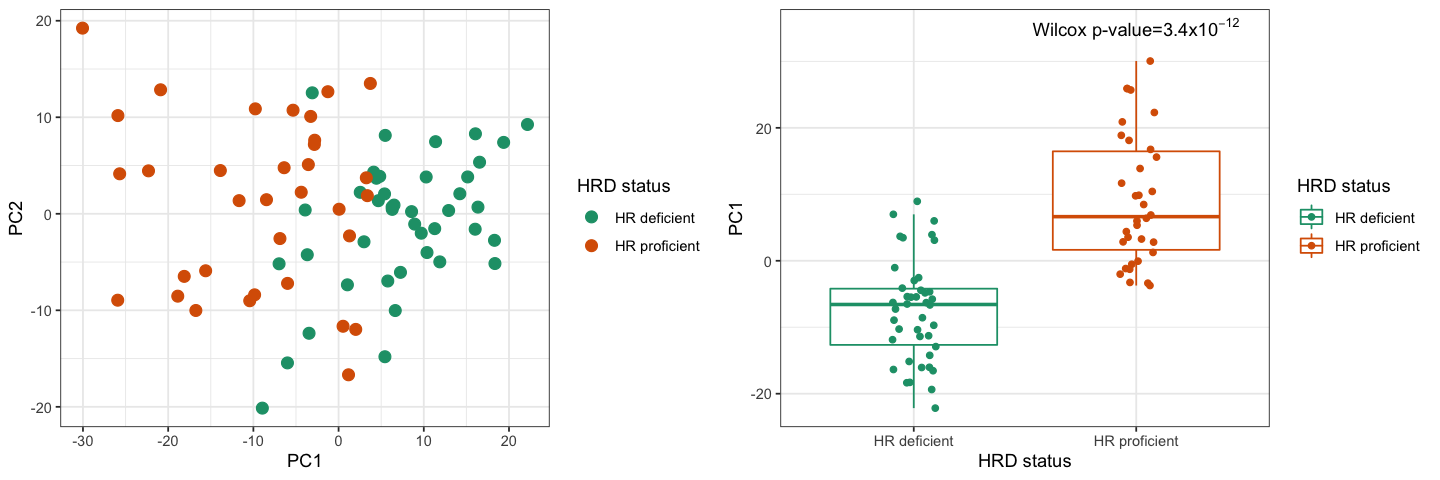

In [97]:
options(repr.plot.width=7,repr.plot.height=4)
pcaData <- plotPCA(vsd, intgroup=c("condition", "Cohort"), returnData=TRUE)
pcaData<-pcaData[HRD,]
pca_dat<-data.frame(condition=as.character(pcaData$condition),p$x[,1:10])

library(ggplot2)
library(gridExtra)

gscatter<-ggplot(pca_dat, aes(-PC1, PC2, color=condition)) +
geom_point(size=3) +
  xlab("PC1") + 
theme_bw()+
scale_colour_brewer(breaks=c("HRDef", "HRProf"),labels=c("HR deficient","HR proficient"),type="qual",palette="Dark2",name="HRD status")+
 ylab("PC2") 


gbox<-ggplot(pca_dat, aes(x=condition, y=PC1, color=condition)) +
geom_boxplot(outlier.shape=NA)+geom_jitter(width=0.1)+
  ylab("PC1") + 
annotate("text",x=2,y=35,label=expression(paste("Wilcox p-value=3.4x",10^-12)))+
scale_colour_brewer(breaks=c("HRDef", "HRProf"),labels=c("HR deficient","HR proficient"),palette="Dark2",name="HRD status")+
theme_bw()+
scale_x_discrete(labels=c("HR deficient","HR proficient"),name="HRD status")

options(repr.plot.width=12)
grid.arrange(gscatter,gbox,nrow=1)

#png("/Volumes/igmm/HGS-OvarianCancerA-SGP-WGS/BRCA1_BRCA2_SVs_paper/Manuscript/Supplementary_figures/SuppFig_HRDDEgenes_PC.png",
   #res=300,width=12,height=4,unit="in")
wilcox.test(pca_dat$PC1~as.factor(pca_dat$condition))
#dev.off()

### Run gene set enrichment on DE genes in HRD

In [215]:
library(clusterProfiler)
ego <- enrichGO(gene          = DE_genes_ensembl,
                universe      = protein_coding_genes,
                OrgDb         = org.Hs.eg.db,
                ont           = "BP",
                pAdjustMethod = "BH",
                pvalueCutoff  = 0.01,
                qvalueCutoff  = 0.05)


clusterProfiler v3.12.0  For help: https://guangchuangyu.github.io/software/clusterProfiler

If you use clusterProfiler in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Yanyan Han, Qing-Yu He. clusterProfiler: an R package for comparing biological themes among gene clusters. OMICS: A Journal of Integrative Biology. 2012, 16(5):284-287.

Attaching package: ‘clusterProfiler’

The following object is masked from ‘package:DelayedArray’:

    simplify



ERROR: Error in is(OrgDb, "character"): object 'org.Hs.eg.db' not found


In [ ]:
head(ego)

** Save HRD gene signature for all samples**

In [99]:
Sample<-as.character(150)
Sample[1:40]<-substr(colnames(protein_coding_vsd)[1:40],1,9)
Sample[41:120]<-substr(colnames(protein_coding_vsd)[41:120],1,8)
Sample[121:150]<-substr(colnames(protein_coding_vsd)[121:150],1,7)

p_all<-prcomp(t(protein_coding_vsd[as.character(DE_genes_ensembl),]))
pcs_all<-data.frame(Sample,p_all$x[,1])

write.table(pcs_all,
            file="/Volumes/igmm/HGS-OvarianCancerA-SGP-WGS/BRCA1_BRCA2_SVs_paper/Manuscript/Intermediate_data/HRD_DEgene_signature.txt",
            sep="\t",row.names=F,col.names=F,quote=F)
 

## Can expression predict HRD?
**DESeq2 on 75% of dataset to identify DE genes then run PCA on those genes and see whether PC1 splits the data by HRD status. Apply to the training (75%) and then test set (25%)** 

**Training set**

In [100]:
dds_cohortspec <- DESeqDataSetFromTximport(txi.salmon2, 
                               colData = coldata,
                                design=~Cohort+Purity+condition)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”using counts and average transcript lengths from tximport


In [127]:
set.seed(20)
HRDcomp_train_def<-sample(which(coldata$condition=="HRDef"),0.8*length(which(coldata$condition=="HRDef")))
HRDcomp_train_prof<-sample(which(coldata$condition=="HRProf"),0.8*length(which(coldata$condition=="HRProf")))

ground_truth_train<-c(HRDcomp_train_def,HRDcomp_train_prof)

HRDcomp_80<-c(HRDcomp_train_def,HRDcomp_train_prof,sample(which(coldata$condition=="Excluded"),0.8*length(which(coldata$condition!="Excluded"))))
HRDcomp_20<-rownames(coldata[-HRDcomp_80,])

length(HRDcomp_75)
length(HRDcomp_25)


[1] 120

[1] 30

In [111]:
set.seed(20)


ddsHRDcomp_tr<-dds_cohortspec[,ground_truth_train]
colData(ddsHRDcomp_tr)$condition<-droplevels(colData(ddsHRDcomp_tr)$condition)
ddsHRDcomp_tr <- DESeq(ddsHRDcomp_tr)
res_75<-results(ddsHRDcomp_tr)

estimating size factors
using 'avgTxLength' from assays(dds), correcting for library size
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


In [113]:
resLFC <- lfcShrink(ddsHRDcomp_tr[protein_coding_genes,], coef="condition_HRProf_vs_HRDef",type="ashr")

resLFC$new.padj<-p.adjust(resLFC$pvalue, method="BH",n=length(protein_coding_genes))

res001<- resLFC[is.na(resLFC$padj)==FALSE & resLFC$new.padj<0.05 & abs(resLFC$log2FoldChange)>1,]
res001_ord<-res001[order(res001$new.padj),]

DE_genes_ensembl<-biom_res[rownames(res001_ord),1]
length(DE_genes_ensembl)

using 'ashr' for LFC shrinkage. If used in published research, please cite:
    Stephens, M. (2016) False discovery rates: a new deal. Biostatistics, 18:2.
    https://doi.org/10.1093/biostatistics/kxw041


[1] 325

### VST normalise counts

In [114]:
dds_correct <- DESeqDataSetFromTximport(txi.salmon2, 
                               colData = coldata,
                                design=~Purity+as.factor(Cohort))

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”using counts and average transcript lengths from tximport


In [115]:
dds_correct <- DESeq(dds_correct)

estimating size factors
using 'avgTxLength' from assays(dds), correcting for library size
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


In [116]:
vsd <- vst(dds_correct , blind=FALSE)

In [117]:
protein_coding_vsd<-assay(vsd)[protein_coding_genes,]

In [146]:
protein_coding_vsd_80<-protein_coding_vsd[,HRDcomp_80]
p<-prcomp(t(protein_coding_vsd_80[as.character(DE_genes_ensembl),]))


**Performance in training set**

Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”


	Wilcoxon rank sum test

data:  pca_dat_75[pca_dat_75$condition != "Excluded", "PC1"] by as.factor(pca_dat_75[pca_dat_75$condition != "Excluded", "condition"])
W = 63, p-value = 2.281e-10
alternative hypothesis: true location shift is not equal to 0


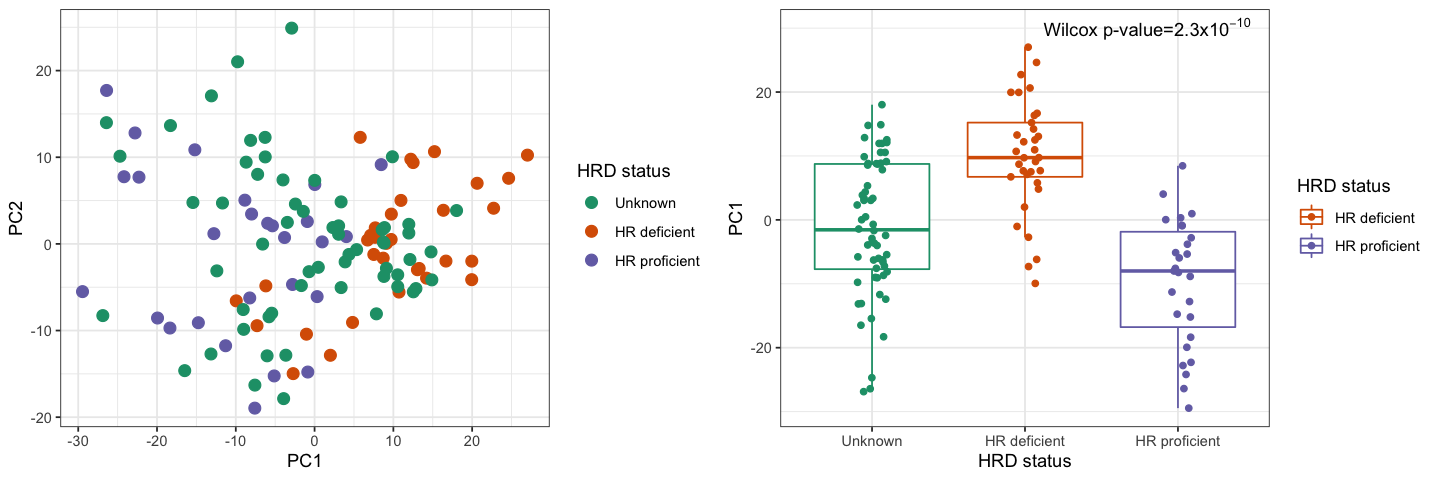

In [155]:
options(repr.plot.width=7,repr.plot.height=4)
pcaData <- plotPCA(vsd, intgroup=c("condition", "Cohort"), returnData=TRUE)
pcaData_75<-pcaData[HRDcomp_80,]
pca_dat_75<-data.frame(condition=as.character(pcaData_75$condition),p$x[,1:10])

library(ggplot2)
library(gridExtra)

gscatter_tr<-ggplot(pca_dat_75, aes(-PC1, PC2, color=condition)) +
geom_point(size=3) +
  xlab("PC1") + 
theme_bw()+
scale_colour_brewer(breaks=c("Excluded", "HRDef","HRProf"),labels=c("Unknown","HR deficient","HR proficient"),type="qual",palette="Dark2",name="HRD status")+
 ylab("PC2") 


gbox_tr<-ggplot(pca_dat_75, aes(x=condition, y=-PC1, color=condition)) +
geom_boxplot(outlier.shape=NA)+geom_jitter(width=0.1)+
  ylab("PC1") + 
annotate("text",x=2.8,y=30,label=expression(paste("Wilcox p-value=2.3x",10^-10)))+
scale_colour_brewer(breaks=c("Unknown","HRDef", "HRProf"),labels=c("Unknown","HR deficient","HR proficient"),palette="Dark2",name="HRD status")+
theme_bw()+
scale_x_discrete(labels=c("Unknown","HR deficient","HR proficient"),name="HRD status")

options(repr.plot.width=12)
grid.arrange(gscatter_tr,gbox_tr,nrow=1)

wilcox.test(pca_dat_75[pca_dat_75$condition!="Excluded","PC1"]~as.factor(pca_dat_75[pca_dat_75$condition!="Excluded","condition"]))

**Performance in test set**

In [156]:
protein_coding_vsd[1:4,1:20]

,SHGSOC001R,SHGSOC002R,SHGSOC003R,SHGSOC004R,SHGSOC007R,SHGSOC008R,SHGSOC010R,SHGSOC014R,SHGSOC015R,SHGSOC016R,SHGSOC017R,SHGSOC019R,SHGSOC021R,SHGSOC022R,SHGSOC023R,SHGSOC024R,SHGSOC031R,SHGSOC032R2,SHGSOC033R,SHGSOC034R
ENSG00000198888,16.55471,16.27833,17.13716,16.83846,16.28213,15.64666,15.71242,16.88773,17.17838,17.19914,16.42571,15.57849,17.81321,16.26442,16.62022,19.82538,17.75155,17.37398,15.65288,17.49516
ENSG00000198763,16.40672,15.13923,17.28204,17.14910,17.44088,15.38362,15.14403,16.65595,16.93413,16.58596,16.39803,15.23203,17.21977,15.84472,16.15081,19.58529,17.78779,17.19381,15.72836,17.15362
ENSG00000198804,19.44907,18.27124,19.46445,19.76459,19.52848,18.40506,18.08842,19.30407,19.47838,19.04385,19.00973,17.87175,19.70279,19.18706,19.13615,21.71512,19.85009,19.29098,18.83424,19.44218
ENSG00000198712,16.44388,15.44407,16.65238,17.39297,16.74070,15.78350,14.60585,16.93196,17.27130,16.93344,16.58319,15.11602,17.28703,16.46421,16.24723,19.92244,17.24168,17.15528,16.64367,16.89459


In [157]:
protein_coding_vsd_20<-protein_coding_vsd[,as.numeric(HRDcomp_20)]
p<-prcomp(t(protein_coding_vsd_20[as.character(DE_genes_ensembl),]))

Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”


	Wilcoxon rank sum test

data:  pca_dat_25[pca_dat_25$condition != "Excluded", "PC1"] by as.factor(pca_dat_25[pca_dat_25$condition != "Excluded", "condition"])
W = 30, p-value = 0.9182
alternative hypothesis: true location shift is not equal to 0


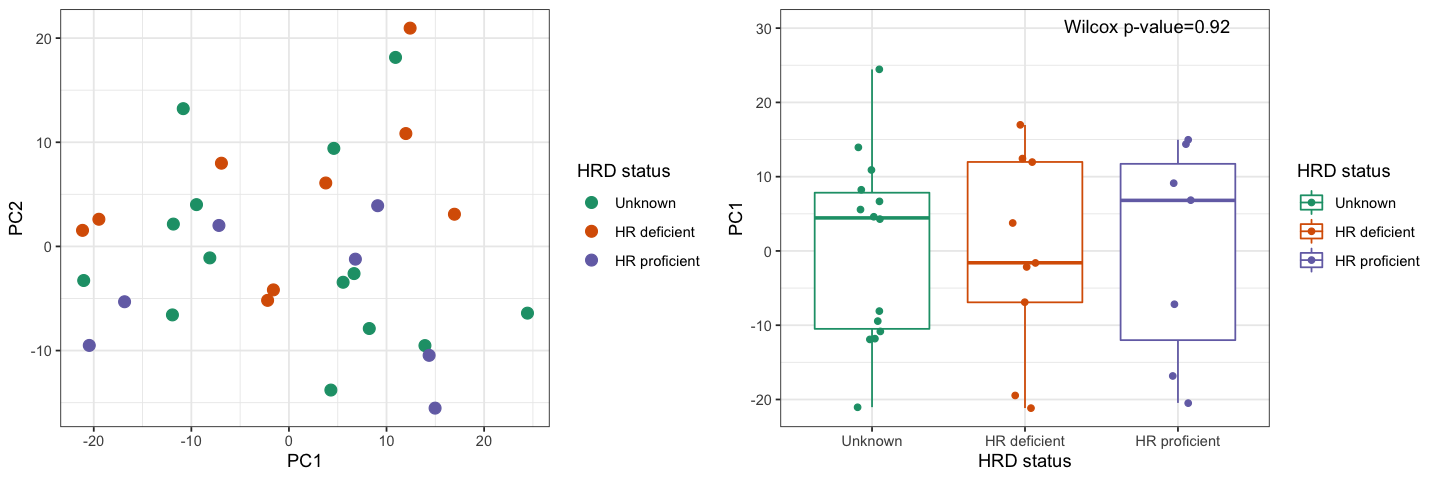

In [164]:
options(repr.plot.width=7,repr.plot.height=4)
pcaData <- plotPCA(vsd, intgroup=c("condition", "Cohort"), returnData=TRUE)
pcaData_25<-pcaData[as.numeric(HRDcomp_20),]
pca_dat_25<-data.frame(condition=as.character(pcaData_25$condition),p$x[,1:10])

library(ggplot2)
library(gridExtra)

gscatter_te<-ggplot(pca_dat_25, aes(PC1, PC2, color=condition)) +
geom_point(size=3) +
  xlab("PC1") + 
theme_bw()+
scale_colour_brewer(breaks=c("Excluded","HRDef", "HRProf"),labels=c("Unknown","HR deficient","HR proficient"),type="qual",palette="Dark2",name="HRD status")+
 ylab("PC2") 


gbox_te<-ggplot(pca_dat_25, aes(x=condition, y=PC1, color=condition)) +
geom_boxplot(outlier.shape=NA)+geom_jitter(width=0.1)+
  ylab("PC1")  + annotate("text",x=2.8,y=30,label=expression(paste("Wilcox p-value=0.92")))+
scale_colour_brewer(breaks=c("Excluded","HRDef", "HRProf"),labels=c("Unknown","HR deficient","HR proficient"),palette="Dark2",name="HRD status")+
theme_bw()+
scale_x_discrete(labels=c("Unknown","HR deficient","HR proficient"),name="HRD status")

options(repr.plot.width=12)
grid.arrange(gscatter_te,gbox_te,nrow=1)

wilcox.test(pca_dat_25[pca_dat_25$condition!="Excluded","PC1"]~as.factor(pca_dat_25[pca_dat_25$condition!="Excluded","condition"]))

**Combined plot**

Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”

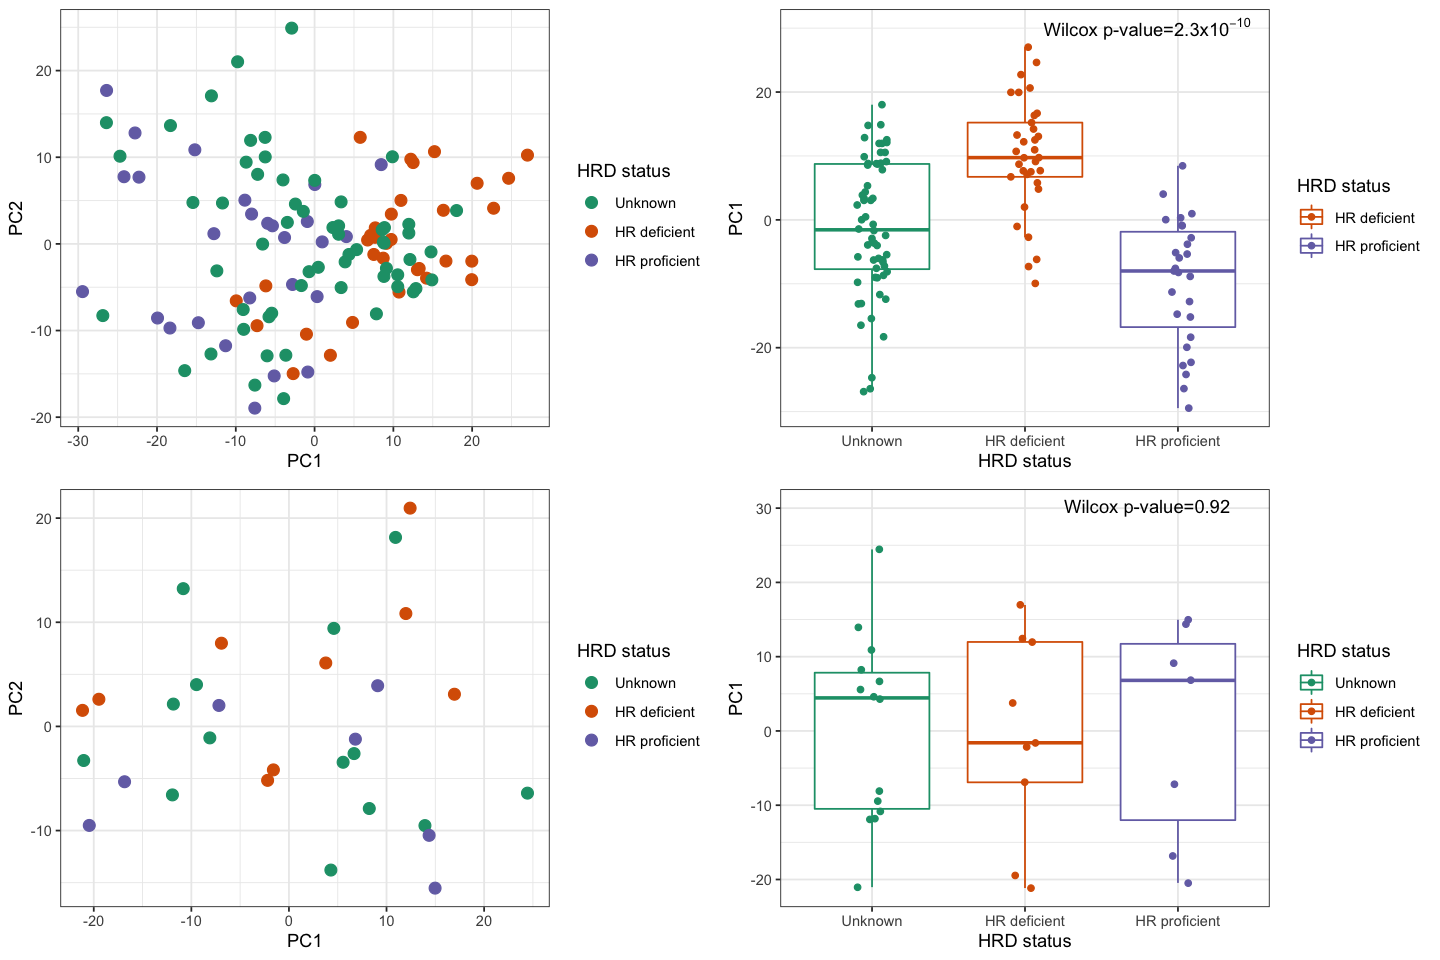

In [168]:
options(repr.plot.height=8)
#png("/Volumes/igmm/HGS-OvarianCancerA-SGP-WGS/BRCA1_BRCA2_SVs_paper/Manuscript/Intermediate_figures/SuppFig_expression_sig.png",
   # res=300,width=12,height=8,unit="in")

png("~/Desktop/BRCA1_BRCA2_SVs_paper/Manuscript/Intermediate_figures/SuppFig_expression_sig.png",
    res=300,width=12,height=8,unit="in")

grid.arrange(gscatter_tr,gbox_tr,gscatter_te,gbox_te,nrow=2)
#dev.off()

## Gene ontology of differentially expressed genes

In [162]:
degenes<-as.data.frame(res001_ord)
dim(degenes)

[1] 190   6

In [154]:
library(clusterProfiler)


Registered S3 method overwritten by 'enrichplot':
  method               from
  fortify.enrichResult DOSE
clusterProfiler v3.12.0  For help: https://guangchuangyu.github.io/software/clusterProfiler

If you use clusterProfiler in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Yanyan Han, Qing-Yu He. clusterProfiler: an R package for comparing biological themes among gene clusters. OMICS: A Journal of Integrative Biology. 2012, 16(5):284-287.

Attaching package: ‘clusterProfiler’

The following object is masked from ‘package:DelayedArray’:

    simplify



In [179]:
ego <- enrichGO(gene         = rownames(degenes),
                OrgDb         = 'org.Hs.eg.db',
                universe      = protein_coding_genes,
                keyType       = 'ENSEMBL',
                ont           = "CC",
                pAdjustMethod = "BH",
                pvalueCutoff  = 0.05,
                qvalueCutoff  = 0.1)

summary(ego)

In [185]:
kegg_gene_ids<-read.table("~/Downloads/mart_export (8).txt",sep="\t",header=T)
kegg_gene_ids<-as.character(kegg_gene_ids[,5])

ego <- enrichKEGG(gene         = kegg_gene_ids,
                organism    = 'hsa',
                pAdjustMethod = "BH",
                pvalueCutoff  = 0.05,
                qvalueCutoff  = 0.1)


In [183]:
summary(ego)

Warning message in summary(ego):
“summary method to convert the object to data.frame is deprecated, please use as.data.frame instead.”

ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>


In [167]:
write.table(rownames(degenes),file="~/Desktop/DEgenes_HRD.txt",sep="\t",quote=F,col.names=F,row.names=F)

## Use HR gene list from tumour lineage shapes BRCA-related phenotypes paper (Jonsson et al, Nature letter 2019)

In [176]:
hr_genes<-c("ENSG00000104320","ENSG00000108384","ENSG00000187741","ENSG00000158169","ENSG00000138376","ENSG00000020922","ENSG00000185379",
"ENSG00000182185","ENSG00000139618","ENSG00000083093","ENSG00000002016","ENSG00000012048","ENSG00000113522","ENSG00000085999",
"ENSG00000136492","ENSG00000149554","ENSG00000051180","ENSG00000149311","ENSG00000183765")

p_HRgenes<-prcomp(t(protein_coding_vsd[hr_genes,]))

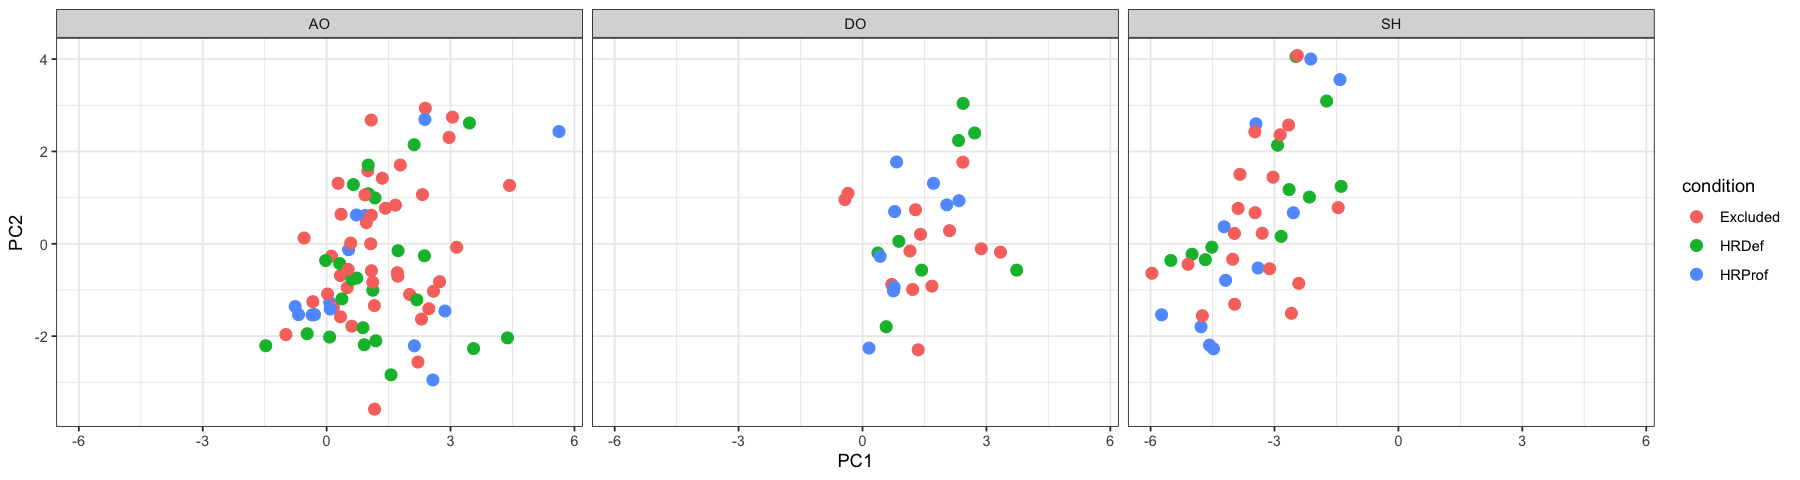

In [177]:
options(repr.plot.width=15,repr.plot.height=4)
pcaData <- plotPCA(vsd, intgroup=c("condition", "Cohort"), returnData=TRUE)
pca_dat<-data.frame(Cohort=as.character(pcaData$Cohort),condition=as.character(pcaData$condition),p_HRgenes$x[,1:10])

ggplot(pca_dat, aes(PC1, PC2, color=condition)) +facet_wrap(~Cohort)+
geom_point(size=3) +
  xlab("PC1") +theme_bw()+
 ylab("PC2")


	Wilcoxon rank sum test

data:  p_HRgenes$x[rownames(pca_dat_all_noexcl), "PC1"] by as.factor(pca_dat_all_noexcl$HRD)
W = 853, p-value = 0.214
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test

data:  p_HRgenes$x[aocs_dat, "PC1"] by as.factor(pca_dat_all_noexcl[aocs_dat, "HRD"])
W = 191, p-value = 0.5008
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test

data:  p_HRgenes$x[tcga_dat, "PC1"] by as.factor(pca_dat_all_noexcl[tcga_dat, "HRD"])
W = 50, p-value = 0.1996
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test

data:  p_HRgenes$x[shgsoc_dat, "PC1"] by as.factor(pca_dat_all_noexcl[shgsoc_dat, "HRD"])
W = 70, p-value = 0.5619
alternative hypothesis: true location shift is not equal to 0


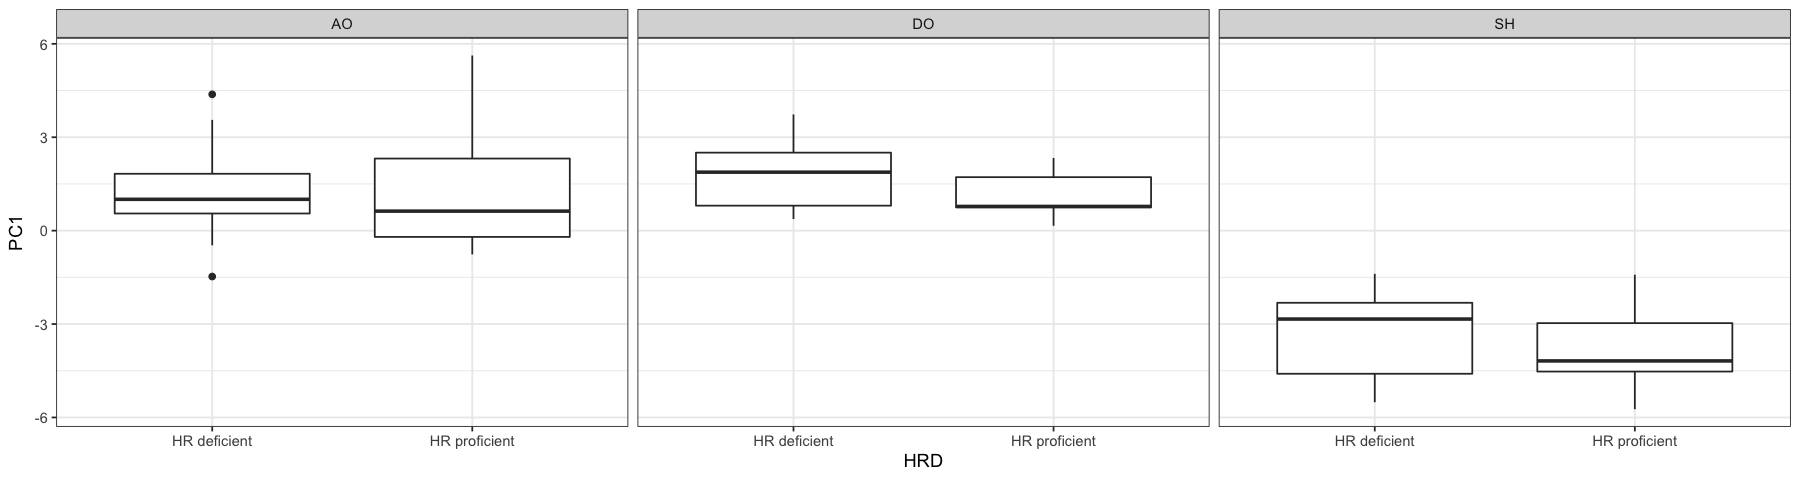

In [179]:
options(repr.plot.width=15,repr.plot.height=4)
wilcox.test(p_HRgenes$x[rownames(pca_dat_all_noexcl),"PC1"]~as.factor(pca_dat_all_noexcl$HRD))

aocs_dat<-rownames(pca_dat_all_noexcl[pca_dat_all_noexcl$Cohort=="AO",])
wilcox.test(p_HRgenes$x[aocs_dat,"PC1"]~as.factor(pca_dat_all_noexcl[aocs_dat,"HRD"]))

tcga_dat<-rownames(pca_dat_all_noexcl[pca_dat_all_noexcl$Cohort=="DO",])
wilcox.test(p_HRgenes$x[tcga_dat,"PC1"]~as.factor(pca_dat_all_noexcl[tcga_dat,"HRD"]))

shgsoc_dat<-rownames(pca_dat_all_noexcl[pca_dat_all_noexcl$Cohort=="SH",])
wilcox.test(p_HRgenes$x[shgsoc_dat,"PC1"]~as.factor(pca_dat_all_noexcl[shgsoc_dat,"HRD"]))


df<-data.frame(PC1=p_HRgenes$x[rownames(pca_dat_all_noexcl),"PC1"],HRD=as.factor(pca_dat_all_noexcl$HRD),Cohort=pca_dat_all_noexcl$Cohort)
ggplot(df,aes(x=HRD,y=PC1))+geom_boxplot()+theme_bw()+facet_wrap(~Cohort)

## Use genes in GO term for homologous recombination pathway

In [181]:
#Get ensembl ids relating to a particular GO term

process<-"GO:0035825"

hr_genes_go<-read.table("/Volumes/igmm/HGS-OvarianCancerA-SGP-WGS/BRCA1_BRCA2_SVs_paper/Analysis/RNAseq/differentialExpression_HR/Genes_related_to_HRGOterm.txt",sep="\t",header=T)
hr_genes_go_ids<-unique(as.character(hr_genes_go[,1]))
hr_genes_go_ids[1:5]

[1] "ENSG00000169689" "ENSG00000126856" "ENSG00000100429" "ENSG00000108384"
[5] "ENSG00000197275"

In [182]:
p_HRGOgenes<-prcomp(t(assay(vsd)[intersect(hr_genes_go_ids,protein_coding_genes),]))

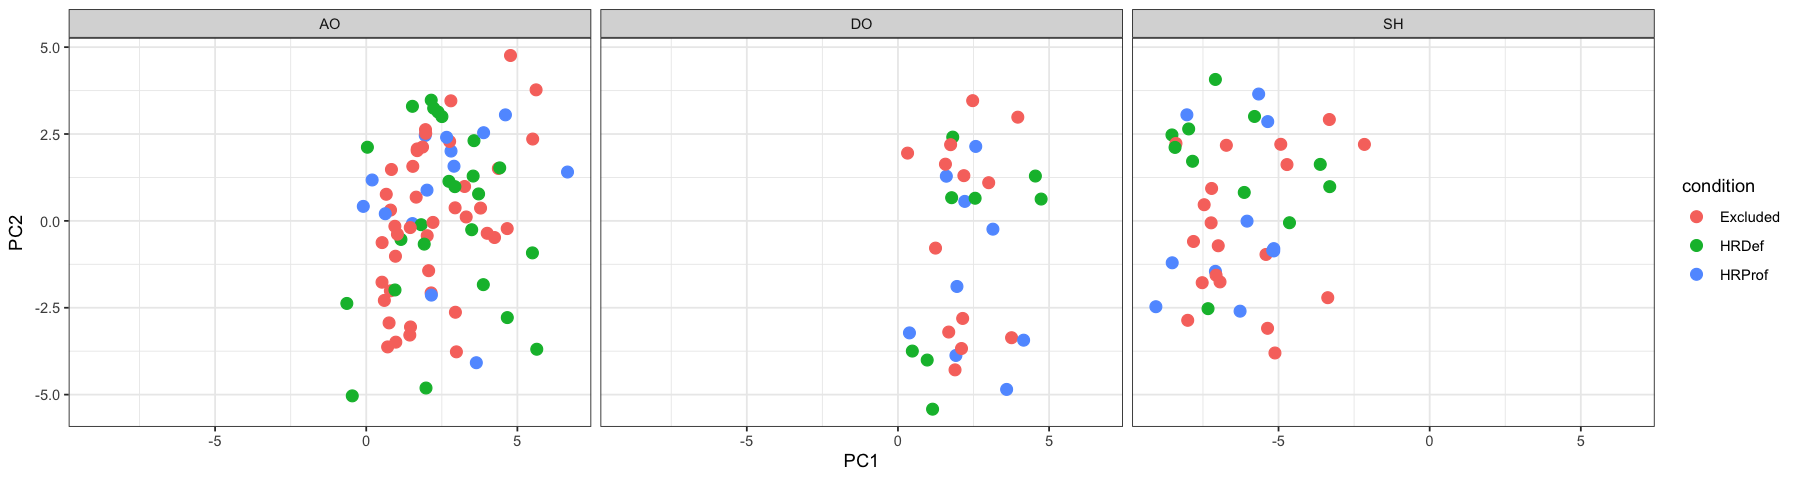

In [183]:
options(repr.plot.width=15,repr.plot.height=4)
pcaData <- plotPCA(vsd, intgroup=c("condition", "Cohort"), returnData=TRUE)
pca_dat<-data.frame(Cohort=as.character(pcaData$Cohort),condition=as.character(pcaData$condition),p_HRGOgenes$x[,1:10])

ggplot(pca_dat, aes(PC1, PC2, color=condition)) +facet_wrap(~Cohort)+
geom_point(size=3) +
  xlab("PC1") +theme_bw()+
 ylab("PC2")


	Wilcoxon rank sum test

data:  p_HRGOgenes$x[aocs_dat, "PC1"] by as.factor(pca_dat_all_noexcl[aocs_dat, "HRD"])
W = 171, p-value = 0.9405
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test

data:  p_HRGOgenes$x[tcga_dat, "PC1"] by as.factor(pca_dat_all_noexcl[tcga_dat, "HRD"])
W = 30, p-value = 0.6058
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test

data:  p_HRGOgenes$x[shgsoc_dat, "PC1"] by as.factor(pca_dat_all_noexcl[shgsoc_dat, "HRD"])
W = 59, p-value = 0.9487
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test

data:  p_HRGOgenes$x[rownames(pca_dat_all_noexcl), "PC1"] by as.factor(pca_dat_all_noexcl$HRD)
W = 776, p-value = 0.6499
alternative hypothesis: true location shift is not equal to 0


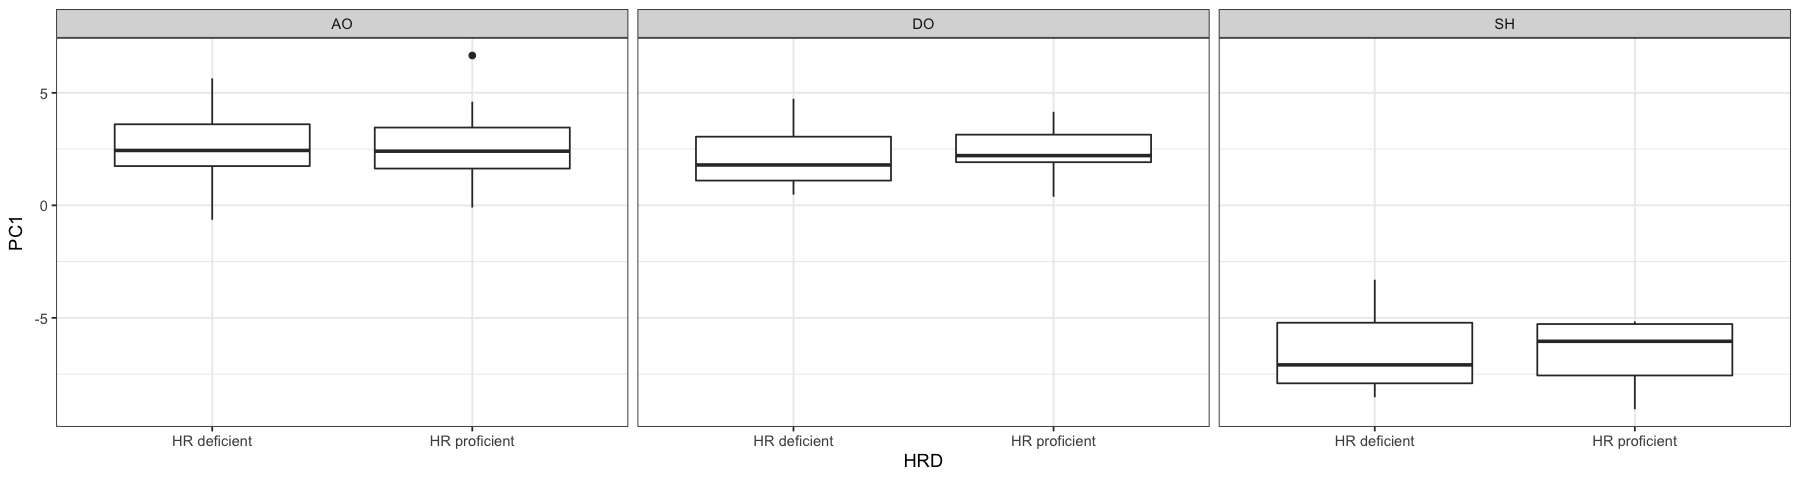

In [184]:
options(repr.plot.width=15,repr.plot.height=4)

aocs_dat<-rownames(pca_dat_all_noexcl[pca_dat_all_noexcl$Cohort=="AO",])
wilcox.test(p_HRGOgenes$x[aocs_dat,"PC1"]~as.factor(pca_dat_all_noexcl[aocs_dat,"HRD"]))

tcga_dat<-rownames(pca_dat_all_noexcl[pca_dat_all_noexcl$Cohort=="DO",])
wilcox.test(p_HRGOgenes$x[tcga_dat,"PC1"]~as.factor(pca_dat_all_noexcl[tcga_dat,"HRD"]))

shgsoc_dat<-rownames(pca_dat_all_noexcl[pca_dat_all_noexcl$Cohort=="SH",])
wilcox.test(p_HRGOgenes$x[shgsoc_dat,"PC1"]~as.factor(pca_dat_all_noexcl[shgsoc_dat,"HRD"]))

wilcox.test(p_HRGOgenes$x[rownames(pca_dat_all_noexcl),"PC1"]~as.factor(pca_dat_all_noexcl$HRD))
df<-data.frame(PC1=p_HRGOgenes$x[rownames(pca_dat_all_noexcl),"PC1"],HRD=as.factor(pca_dat_all_noexcl$HRD),Cohort=pca_dat_all_noexcl$Cohort)
ggplot(df,aes(x=HRD,y=PC1))+geom_boxplot()+theme_bw()+facet_wrap(~Cohort)

## Use genes from cell lines paper (Peng et al 2014)

In [185]:
cell_lines_genes<-read.csv("~/Downloads/ncomms4361-s1-converted.csv")
cell_lines_genes<-as.character(cell_lines_genes[,1])

#convert to ensembl ids

biom_res<-getBM(attributes=c('ensembl_gene_id','external_gene_name'), 
      filters = 'external_gene_name', 
      values = cell_lines_genes, 
      mart = ensembl)

cell_lines_genes_ensembl<-as.character(biom_res[,1])

In [186]:
p_HR_celllines_genes<-prcomp(t(assay(vsd)[intersect(cell_lines_genes_ensembl,rownames(assay(vsd))),]))

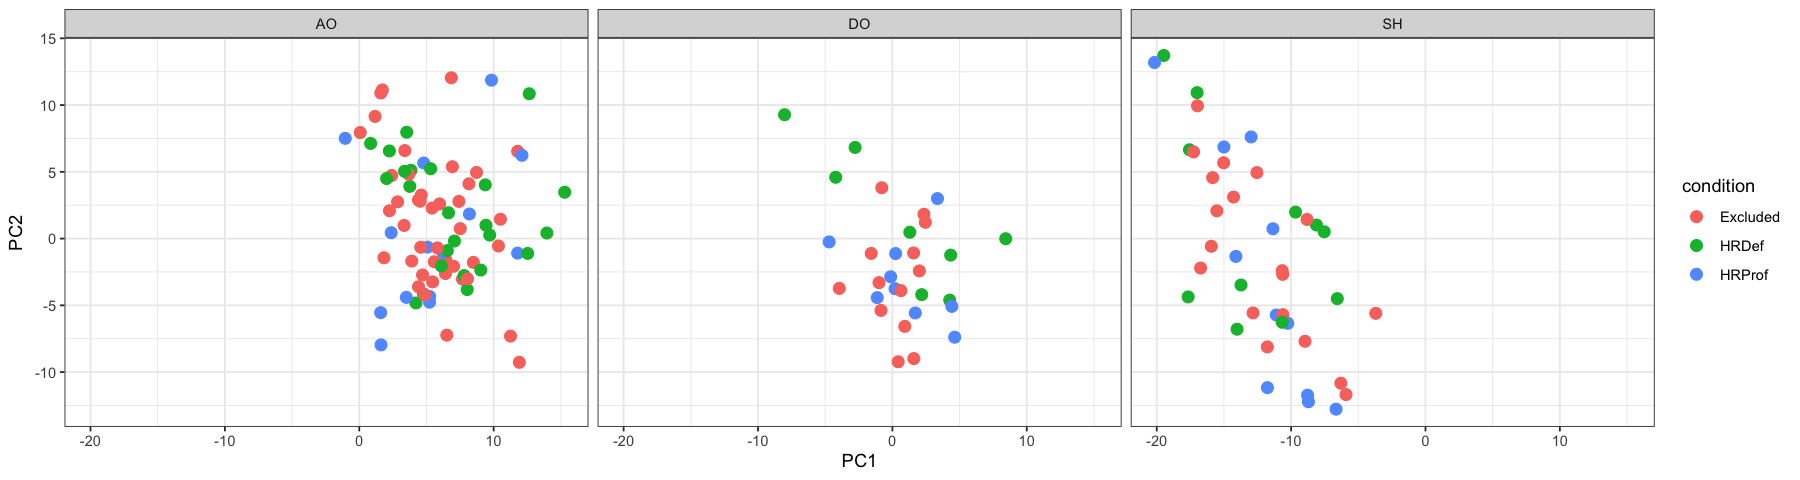

In [187]:
options(repr.plot.width=15,repr.plot.height=4)
pcaData <- plotPCA(vsd, intgroup=c("condition", "Cohort"), returnData=TRUE)
pca_dat<-data.frame(Cohort=as.character(pcaData$Cohort),condition=as.character(pcaData$condition),p_HR_celllines_genes$x[,1:10])

ggplot(pca_dat, aes(PC1, PC2, color=condition)) +facet_wrap(~Cohort)+
geom_point(size=3) +
  xlab("PC1") +theme_bw()+
 ylab("PC2")


	Wilcoxon rank sum test

data:  p_HR_celllines_genes$x[aocs_dat, "PC1"] by as.factor(pca_dat_all_noexcl[aocs_dat, "HRD"])
W = 204, p-value = 0.2867
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test

data:  p_HR_celllines_genes$x[tcga_dat, "PC1"] by as.factor(pca_dat_all_noexcl[tcga_dat, "HRD"])
W = 36, p-value = 1
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test

data:  p_HR_celllines_genes$x[shgsoc_dat, "PC1"] by as.factor(pca_dat_all_noexcl[shgsoc_dat, "HRD"])
W = 56, p-value = 0.7969
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test

data:  p_HR_celllines_genes$x[rownames(pca_dat_all_noexcl), "PC1"] by as.factor(pca_dat_all_noexcl$HRD)
W = 868, p-value = 0.1623
alternative hypothesis: true location shift is not equal to 0


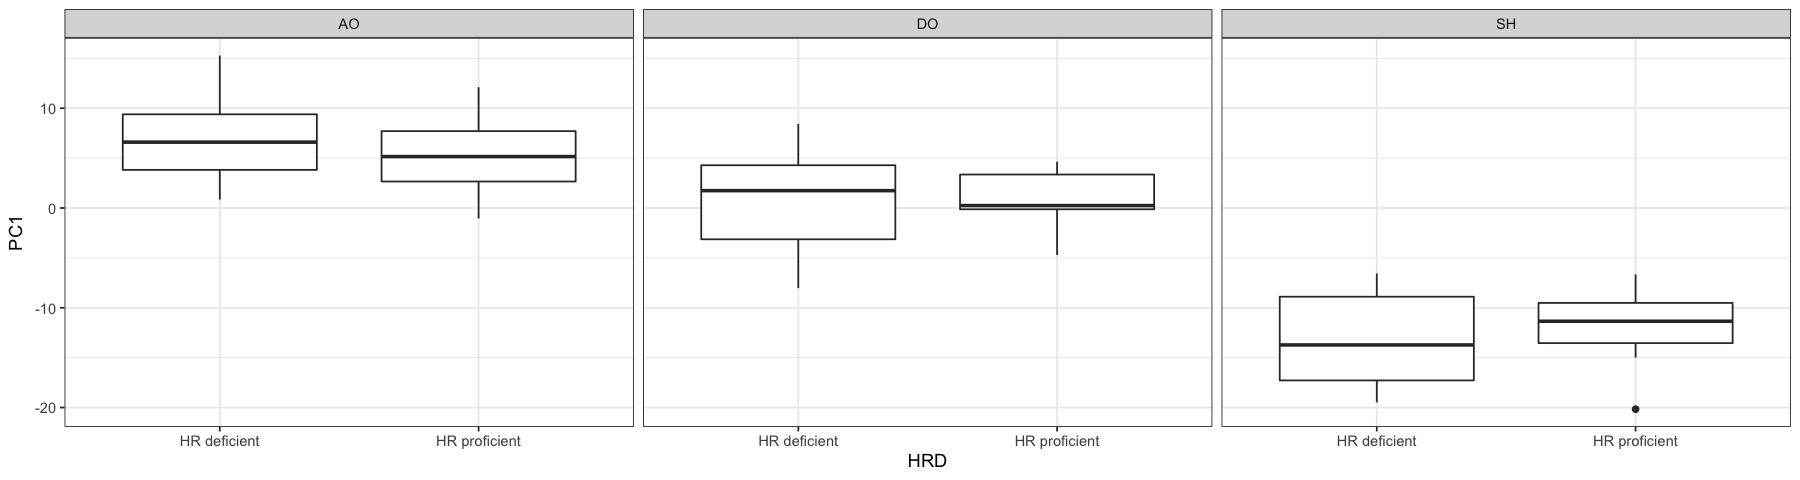

In [188]:
options(repr.plot.width=15,repr.plot.height=4)
aocs_dat<-rownames(pca_dat_all_noexcl[pca_dat_all_noexcl$Cohort=="AO",])
wilcox.test(p_HR_celllines_genes$x[aocs_dat,"PC1"]~as.factor(pca_dat_all_noexcl[aocs_dat,"HRD"]))

tcga_dat<-rownames(pca_dat_all_noexcl[pca_dat_all_noexcl$Cohort=="DO",])
wilcox.test(p_HR_celllines_genes$x[tcga_dat,"PC1"]~as.factor(pca_dat_all_noexcl[tcga_dat,"HRD"]))

shgsoc_dat<-rownames(pca_dat_all_noexcl[pca_dat_all_noexcl$Cohort=="SH",])
wilcox.test(p_HR_celllines_genes$x[shgsoc_dat,"PC1"]~as.factor(pca_dat_all_noexcl[shgsoc_dat,"HRD"]))

wilcox.test(p_HR_celllines_genes$x[rownames(pca_dat_all_noexcl),"PC1"]~as.factor(pca_dat_all_noexcl$HRD))
df<-data.frame(PC1=p_HR_celllines_genes$x[rownames(pca_dat_all_noexcl),"PC1"],HRD=as.factor(pca_dat_all_noexcl$HRD),Cohort=pca_dat_all_noexcl$Cohort)
ggplot(df,aes(x=HRD,y=PC1))+geom_boxplot()+theme_bw()+facet_wrap(~Cohort)

## Gene list from Lu et al (2014)

In [231]:
lu_2014_genes<-read.csv("/Volumes/igmm/HGS-OvarianCancerA-SGP-WGS/BRCA1_BRCA2_SVs_paper/Analysis/RNAseq/differentialExpression_HR/Lu_2014_HRD_genelist.csv")
lu_2014_genelist<-as.character(lu_2014_genes[,1])

#convert to ensembl ids

biom_res<-getBM(attributes=c('ensembl_gene_id','external_gene_name'), 
      filters = 'external_gene_name', 
      values = lu_2014_genelist, 
      mart = ensembl)

colnames(biom_res)[2]<-"Gene.symbol"

lu_ensembl_class<-merge(lu_2014_genes,biom_res,by="Gene.symbol")
rownames(lu_ensembl_class)<-lu_ensembl_class$ensembl_gene_id

lu_ensembl_class<-lu_ensembl_class[which(as.character(lu_ensembl_class$ensembl_gene_id) %in% as.character(rownames(assay(vsd)))),]

lu_ensembl_upgenes<-as.character(lu_ensembl_class[lu_ensembl_class$class==1,"ensembl_gene_id"])
lu_ensembl_downgenes<-as.character(lu_ensembl_class[lu_ensembl_class$class==-1,"ensembl_gene_id"])

length(unique(lu_ensembl_upgenes))
length(unique(lu_ensembl_downgenes))


[1] 62

[1] 35

In [232]:
length(rownames(pca_dat_all_noexcl))

[1] 77

**PCA on gene list**

In [233]:
lu_2014_genes_ensembl<-as.character(lu_ensembl_class$ensembl_gene_id)


In [234]:
p_HR_lu2014_genes<-prcomp(t(assay(vsd)[intersect(lu_2014_genes_ensembl,rownames(assay(vsd))),]))

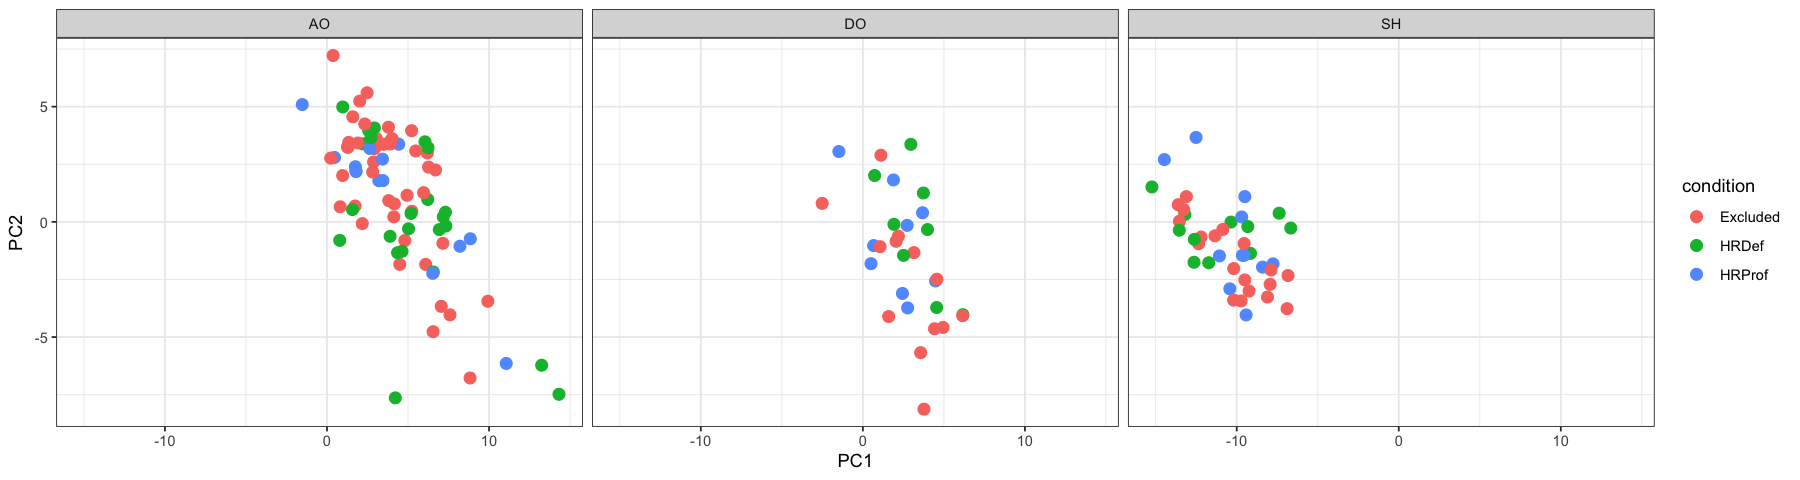

In [235]:
options(repr.plot.width=15,repr.plot.height=4)
pcaData <- plotPCA(vsd, intgroup=c("condition", "Cohort"), returnData=TRUE)
pca_dat<-data.frame(Cohort=as.character(pcaData$Cohort),condition=as.character(pcaData$condition),p_HR_lu2014_genes$x[,1:10])

ggplot(pca_dat, aes(PC1, PC2, color=condition)) +facet_wrap(~Cohort)+
geom_point(size=3) +
  xlab("PC1") +theme_bw()+
 ylab("PC2")


	Wilcoxon rank sum test

data:  p_HR_lu2014_genes$x[rownames(pca_dat_all_noexcl), "PC1"] by as.factor(pca_dat_all_noexcl$HRD)
W = 897, p-value = 0.08964
alternative hypothesis: true location shift is not equal to 0


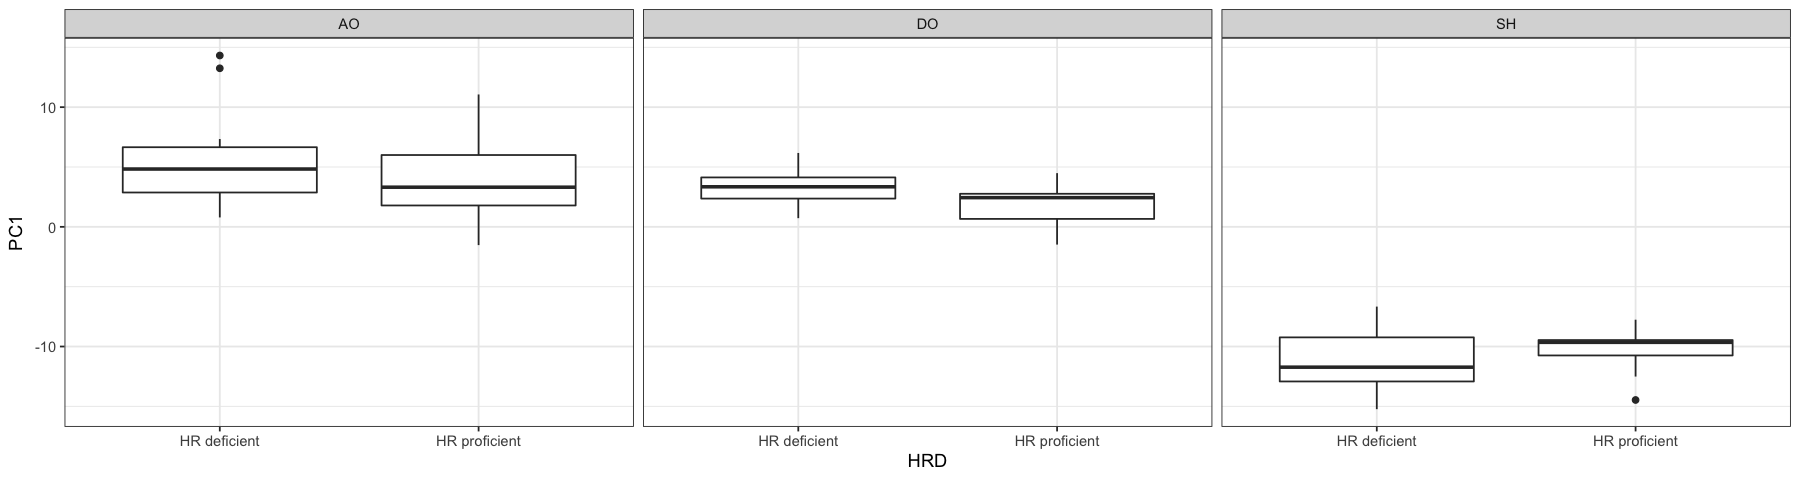

In [236]:
options(repr.plot.width=15,repr.plot.height=4)

wilcox.test(p_HR_lu2014_genes$x[rownames(pca_dat_all_noexcl),"PC1"]~as.factor(pca_dat_all_noexcl$HRD))
df<-data.frame(Sample=rownames(pca_dat_all_noexcl),PC1=p_HR_lu2014_genes$x[rownames(pca_dat_all_noexcl),"PC1"],HRD=as.factor(pca_dat_all_noexcl$HRD),Cohort=pca_dat_all_noexcl$Cohort)
ggplot(df,aes(x=HRD,y=PC1))+geom_boxplot()+theme_bw()+facet_wrap(~Cohort)

**t-test statistics - HRDS**

In [237]:
up<-t(assay(vsd)[lu_ensembl_upgenes,])

down<-t(assay(vsd)[lu_ensembl_downgenes,])

HRDS<-rep(NA,151)
for (i in 1:151){
    tt<-t.test(up[i,],down[i,])
    HRDS[i]<-tt$statistic
}

lu_df<-data.frame(Sample=rownames(up),HRDS)

newdf<-merge(lu_df,df,by="Sample")
rownames(newdf)<-as.character(newdf$Sample)


,Sample,PC1,HRD,Cohort
,<fct>,<dbl>,<fct>,<fct>
SHGSOC001R,SHGSOC001R,-9.15337,HR deficient,SH


,Sample,HRDS,PC1,HRD,Cohort
,<fct>,<dbl>,<dbl>,<fct>,<fct>
AOCS_034_ICGCDBLG2010050402TR,AOCS_034_ICGCDBLG2010050402TR,-1.44948,7.176162,HR deficient,AO



	Wilcoxon rank sum test

data:  newdf[aocs_dat, "HRDS"] by as.factor(newdf[aocs_dat, "HRD"])
W = 242, p-value = 0.02477
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test

data:  newdf[tcga_dat, "HRDS"] by as.factor(newdf[tcga_dat, "HRD"])
W = 50, p-value = 0.1996
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test

data:  newdf[shgsoc_dat, "HRDS"] by as.factor(newdf[shgsoc_dat, "HRD"])
W = 58, p-value = 0.8977
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test

data:  newdf[, "HRDS"] by as.factor(newdf$HRD)
W = 931, p-value = 0.04022
alternative hypothesis: true location shift is not equal to 0


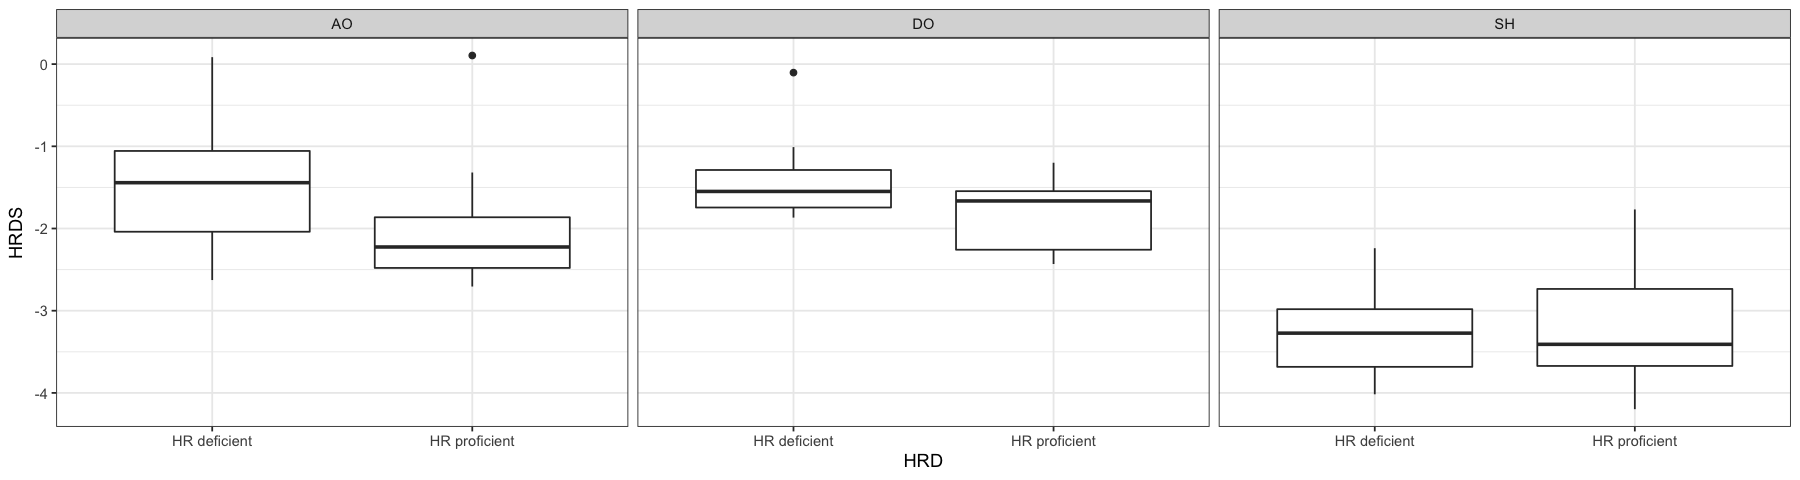

In [238]:
options(repr.plot.width=15,repr.plot.height=4)
#wilcox.test(p_HR_lu2014_genes$x[rownames(pca_dat_all_noexcl),"PC1"]~as.factor(pca_dat_all_noexcl$HRD))
aocs_dat<-rownames(pca_dat_all_noexcl[pca_dat_all_noexcl$Cohort=="AO",])

wilcox.test(newdf[aocs_dat,"HRDS"]~as.factor(newdf[aocs_dat,"HRD"]))

tcga_dat<-rownames(pca_dat_all_noexcl[pca_dat_all_noexcl$Cohort=="DO",])
wilcox.test(newdf[tcga_dat,"HRDS"]~as.factor(newdf[tcga_dat,"HRD"]))

shgsoc_dat<-rownames(pca_dat_all_noexcl[pca_dat_all_noexcl$Cohort=="SH",])
wilcox.test(newdf[shgsoc_dat,"HRDS"]~as.factor(newdf[shgsoc_dat,"HRD"]))


wilcox.test(newdf[,"HRDS"]~as.factor(newdf$HRD))
ggplot(newdf,aes(x=HRD,y=HRDS))+geom_boxplot()+theme_bw()+facet_wrap(~Cohort)

## JCO 2009 Konstantinopoulos 

In [239]:
konstantinopoulos_genelist<-read.csv("/Volumes/igmm/HGS-OvarianCancerA-SGP-WGS/BRCA1_BRCA2_SVs_paper/Analysis/RNAseq/differentialExpression_HR/JCO.2009.27.5719_genelist.csv")
konstantinopoulos_genes<-as.character(konstantinopoulos_genelist[,2])

#convert to ensembl ids

biom_res<-getBM(attributes=c('ensembl_gene_id','external_gene_name'), 
      filters = 'external_gene_name', 
      values = konstantinopoulos_genes, 
      mart = ensembl)

konstantinopoulos_genes_ensembl<-as.character(biom_res[,1])

**Konstantinopoulos genes PCA**

In [240]:
p_konstantinopoulos_genes<-prcomp(t(assay(vsd)[intersect(konstantinopoulos_genes_ensembl,rownames(assay(vsd))),]))

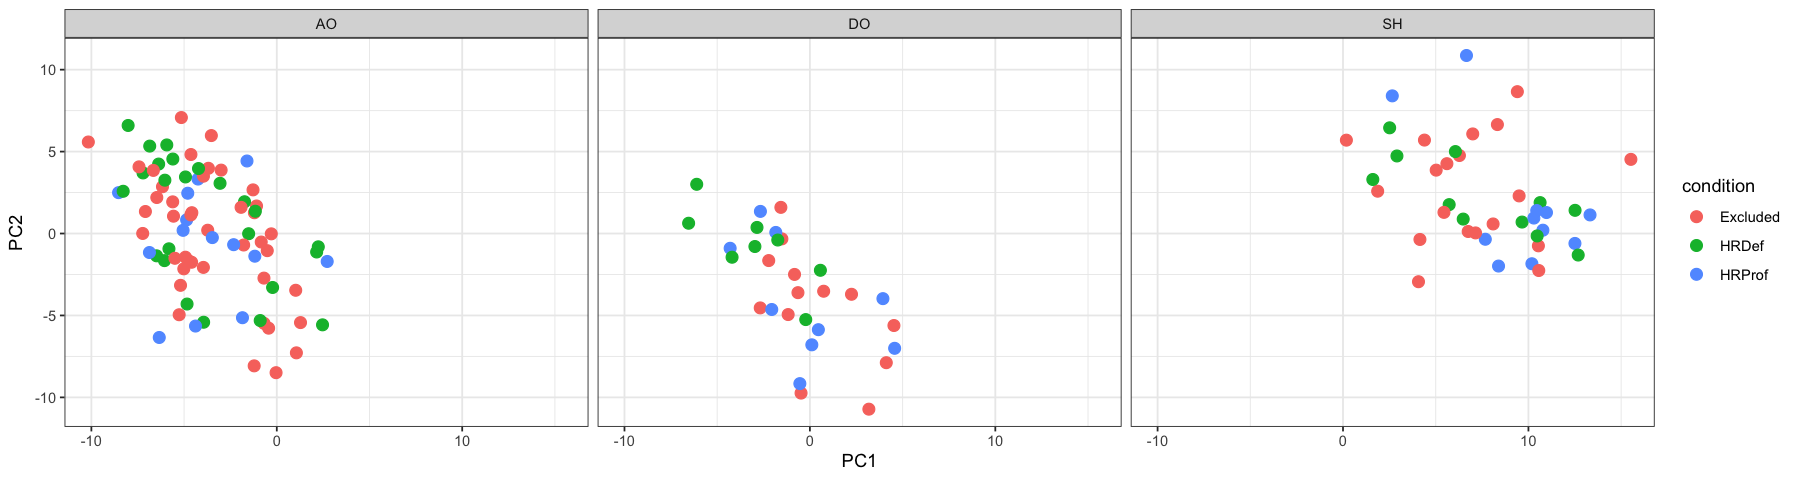

In [241]:
options(repr.plot.width=15,repr.plot.height=4)
pcaData <- plotPCA(vsd, intgroup=c("condition", "Cohort"), returnData=TRUE)
pca_dat<-data.frame(Cohort=as.character(pcaData$Cohort),condition=as.character(pcaData$condition),p_konstantinopoulos_genes$x[,1:10])

ggplot(pca_dat, aes(PC1, PC2, color=condition)) +facet_wrap(~Cohort)+
geom_point(size=3) +
  xlab("PC1") +theme_bw()+
 ylab("PC2")


	Wilcoxon rank sum test

data:  p_konstantinopoulos_genes$x[rownames(pca_dat_all_noexcl), "PC1"] by as.factor(pca_dat_all_noexcl$HRD)
W = 578, p-value = 0.1181
alternative hypothesis: true location shift is not equal to 0


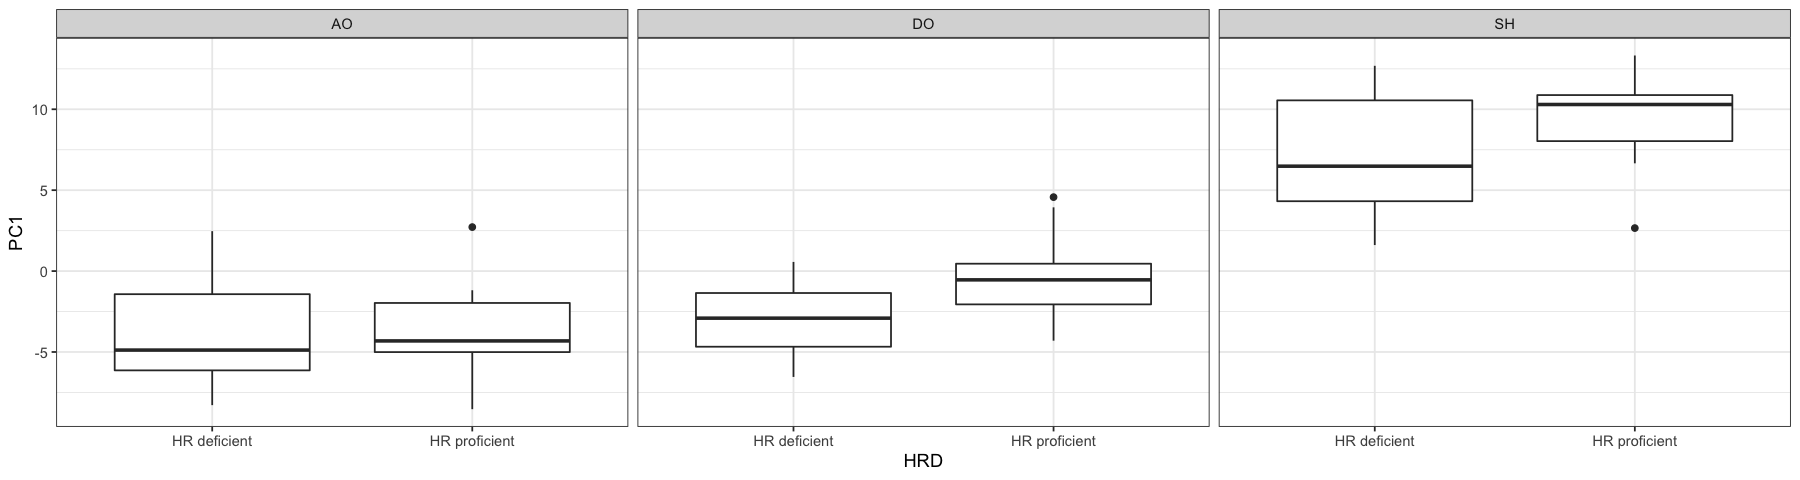

In [242]:
options(repr.plot.width=15,repr.plot.height=4)
wilcox.test(p_konstantinopoulos_genes$x[rownames(pca_dat_all_noexcl),"PC1"]~as.factor(pca_dat_all_noexcl$HRD))
df<-data.frame(Sample=rownames(pca_dat_all_noexcl),PC1=p_konstantinopoulos_genes$x[rownames(pca_dat_all_noexcl),"PC1"],HRD=as.factor(pca_dat_all_noexcl$HRD),Cohort=pca_dat_all_noexcl$Cohort)
ggplot(df,aes(x=HRD,y=PC1))+geom_boxplot()+theme_bw()+facet_wrap(~Cohort)

**Konstantinopoulos weights**

In [250]:
expr<-assay(vsd)[intersect(konstantinopoulos_genes_ensembl,rownames(assay(vsd))),]

rownames(biom_res)<-as.character(biom_res[,1])
colnames(biom_res)[2]<-"Gene.Symbol"
weights<-merge(biom_res[intersect(konstantinopoulos_genes_ensembl,rownames(assay(vsd))),],konstantinopoulos_genelist,by="Gene.Symbol")
rownames(weights)<-as.character(weights[,2])
weights<-weights[rownames(expr),5]

kons_sc<-weights %*% expr
kons_df<-data.frame(Sample=colnames(expr),Kons_Score=t(kons_sc))

newdf<-merge(kons_df,df,by="Sample")
rownames(newdf)<-as.character(newdf$Sample)



	Wilcoxon rank sum test

data:  newdf[aocs_dat, "Kons_Score"] by as.factor(newdf[aocs_dat, "HRD"])
W = 156, p-value = 0.7311
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test

data:  newdf[tcga_dat, "Kons_Score"] by as.factor(newdf[tcga_dat, "HRD"])
W = 51, p-value = 0.1672
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test

data:  newdf[shgsoc_dat, "Kons_Score"] by as.factor(newdf[shgsoc_dat, "HRD"])
W = 73, p-value = 0.4385
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test

data:  newdf[, "Kons_Score"] by as.factor(newdf$HRD)
W = 783, p-value = 0.5993
alternative hypothesis: true location shift is not equal to 0


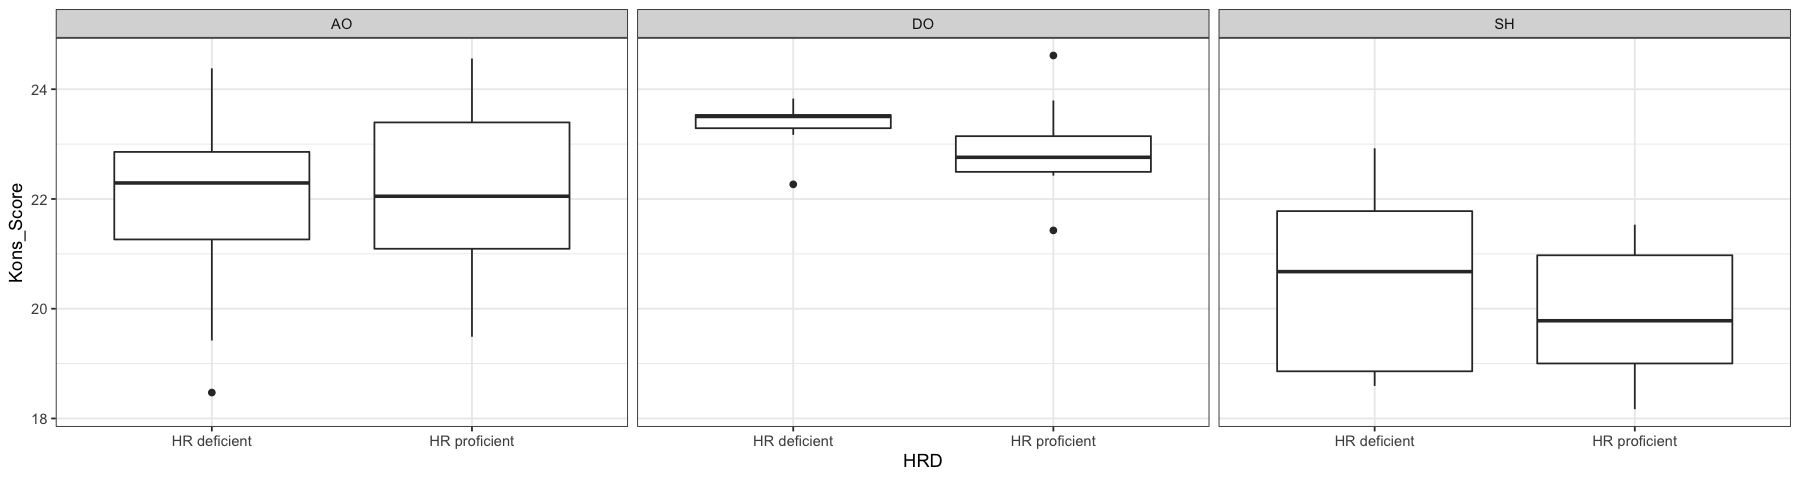

In [251]:
options(repr.plot.width=15,repr.plot.height=4)
#wilcox.test(p_HR_lu2014_genes$x[rownames(pca_dat_all_noexcl),"PC1"]~as.factor(pca_dat_all_noexcl$HRD))
aocs_dat<-rownames(pca_dat_all_noexcl[pca_dat_all_noexcl$Cohort=="AO",])
wilcox.test(newdf[aocs_dat,"Kons_Score"]~as.factor(newdf[aocs_dat,"HRD"]))

tcga_dat<-rownames(pca_dat_all_noexcl[pca_dat_all_noexcl$Cohort=="DO",])
wilcox.test(newdf[tcga_dat,"Kons_Score"]~as.factor(newdf[tcga_dat,"HRD"]))

shgsoc_dat<-rownames(pca_dat_all_noexcl[pca_dat_all_noexcl$Cohort=="SH",])
wilcox.test(newdf[shgsoc_dat,"Kons_Score"]~as.factor(newdf[shgsoc_dat,"HRD"]))

wilcox.test(newdf[,"Kons_Score"]~as.factor(newdf$HRD))
ggplot(newdf,aes(x=HRD,y=Kons_Score))+geom_boxplot()+theme_bw()+facet_wrap(~Cohort)

# Effect of neo-adjuvant chemotherapy on gene expression

In [95]:
Sample<-as.character(150)
Sample[1:40]<-substr(colnames(protein_coding_vsd)[1:40],1,9)
Sample[41:120]<-substr(colnames(protein_coding_vsd)[41:120],1,8)
Sample[121:150]<-substr(colnames(protein_coding_vsd)[121:150],1,7)

p<-prcomp(t(protein_coding_vsd))
pcs<-data.frame(Sample,p$x[,1:2])

#Load centre info
centre_dat<-read.csv("/Volumes/igmm/HGS-OvarianCancerA-SGP-WGS/BRCA1_BRCA2_SVs_paper/Analysis/Clinical_associations/Scottish_samples_bycentre.csv")
colnames(centre_dat)[1]<-"Sample"

#Load clinical data
clinical_dat<-read.table("/Volumes/igmm/HGS-OvarianCancerA-SGP-WGS/BRCA1_BRCA2_SVs_paper/Manuscript/Supplementary_tables/HGSOC_clinical_data.txt",
                         sep="\t",header=T)

pca_dat_centre<-merge(pcs,centre_dat,by="Sample",all.x=T)
pca_dat_clinical<-merge(pca_dat_centre,clinical_dat,by="Sample",all.x=T)


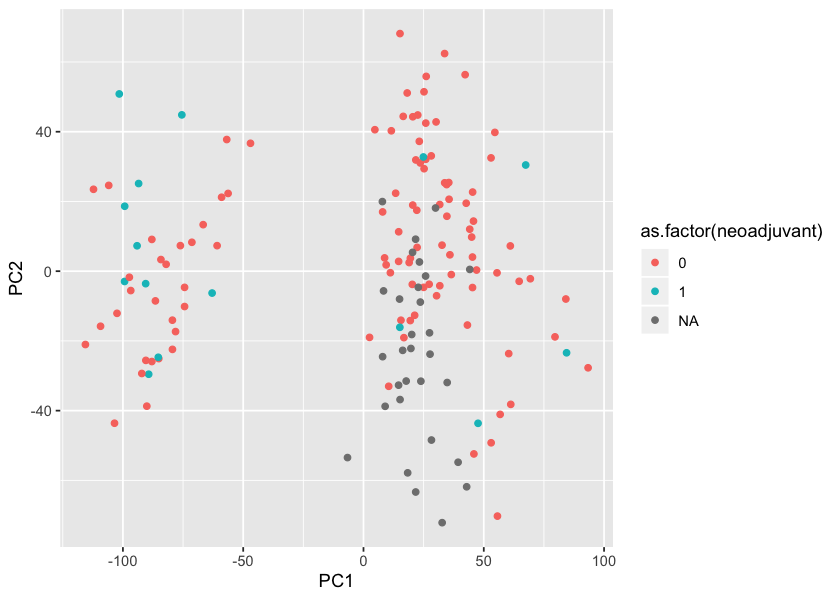

In [67]:
options(repr.plot.width=7,repr.plot.height=5)
ggplot(pca_dat_clinical, aes(x=PC1,y=PC2,col=as.factor(neoadjuvant)))+geom_point()


In [77]:
txi.salmon3 <- tximport(new_files[1:120], type = "salmon", tx2gene = tx2knownGene)

coldata2<-merge(rna,sample_expr,by="Sample",all.x=T)
coldata<-merge(coldata2,clinical_dat,by="Sample",all.x=T)

rownames(coldata)<-as.character(coldata$RNA_sample)

coldata[is.na(coldata$neoadjuvant),"neoadjuvant"]<-"Excluded"

coldata<-coldata[as.character(rna$RNA_sample),]
table(coldata$neoadjuvant)

coldata$condition<-factor(coldata$neoadjuvant)
rownames(coldata)<-c(1:150)

dds <- DESeqDataSetFromTximport(txi.salmon3, 
                               colData = coldata[coldata$neoadjuvant!="Excluded",],
                                design=~Cohort+condition)

reading in files with read_tsv
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 
summarizing abundance
summarizing counts
summarizing length



       0        1 Excluded 
     105       15       30 

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”factor levels were dropped which had no samples
using counts and average transcript lengths from tximport


In [79]:
dds <- DESeq(dds)
res<-results(dds)

estimating size factors
using 'avgTxLength' from assays(dds), correcting for library size
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 3741 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


In [81]:
resLFC <- lfcShrink(dds[protein_coding_genes,], coef="condition_1_vs_0",type="ashr")

resLFC$new.padj<-p.adjust(resLFC$pvalue, method="BH",n=length(protein_coding_genes))

res001<- resLFC[is.na(resLFC$padj)==FALSE & resLFC$new.padj<0.05 & abs(resLFC$log2FoldChange)>1,]
res001_ord<-res001[order(res001$new.padj),]


using 'ashr' for LFC shrinkage. If used in published research, please cite:
    Stephens, M. (2016) False discovery rates: a new deal. Biostatistics, 18:2.
    https://doi.org/10.1093/biostatistics/kxw041


In [91]:
path<-"/Volumes/igmm/HGS-OvarianCancerA-SGP-WGS/BRCA1_BRCA2_SVs_paper/Manuscript/Intermediate_data/"
write.table(rownames(res001_ord),file=paste(path,"DE_genes_inpatients_w_wo_neoadjchemo.txt",sep=""),sep="\t",quote=F,col.names=F)

There are 93 genes that are differentially expressed between patients that have had neo-adjuvant chemo and not. These 93 genes do not include BRCA1/2. Also 93 out of the whole transcriptome is not very many...

**GO of DE genes between neoadjuvant and not**

In [87]:
library(clusterProfiler)
ego <- enrichGO(gene         = rownames(res001_ord),
                OrgDb         = 'org.Hs.eg.db',
                universe      = protein_coding_genes,
                keyType       = 'ENSEMBL',
                ont           = "BP",
                pAdjustMethod = "BH",
                pvalueCutoff  = 0.05,
                qvalueCutoff  = 0.05)


Loading required package: org.Hs.eg.db
Loading required package: AnnotationDbi



In [89]:
head(ego)

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0008217,GO:0008217,regulation of blood pressure,7/76,84/8077,1.251851e-05,0.02068058,0.01934439,ENSG00000163751/ENSG00000100448/ENSG00000092009/ENSG00000109255/ENSG00000180914/ENSG00000164116/ENSG00000133110,7
GO:0016486,GO:0016486,peptide hormone processing,4/76,20/8077,3.128701e-05,0.02584307,0.02417333,ENSG00000163751/ENSG00000100448/ENSG00000092009/ENSG00000175426,4


## Cohort differences in expression

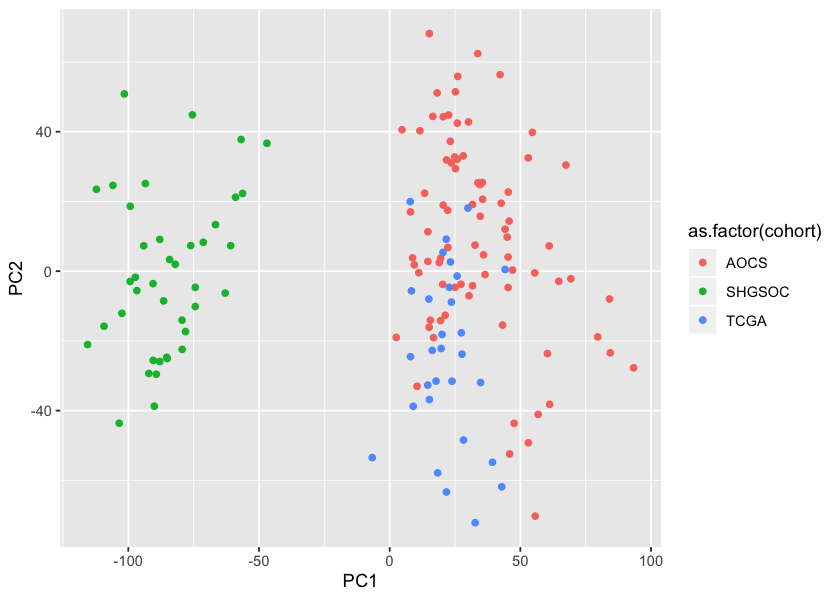

In [93]:
ggplot(pca_dat_clinical, aes(x=PC1,y=PC2,col=as.factor(cohort)))+geom_point()